## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
training_data = df.iloc[:, 1:2].values

## Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_data)

## Creating a Data Structure

### Data Structure with 60 Timesteps and One Output

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the RNN

### Importing the Libraries

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialize RNN

In [16]:
regressor = Sequential()

### Adding Layers

In [17]:
# Adding the first LSTM layer and some droupout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some droupout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some droupout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some droupout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

### Compile the RNN

In [19]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Training the RNN

In [21]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


38/38 [==============================] - 2s 51ms/step - loss: 0.0052
Epoch 2/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0046
Epoch 3/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0041
Epoch 5/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0037
Epoch 9/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0040
Epoch 13/100
38/38 [==============

## Making Predictions and Visualizing the results

In [26]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

In [27]:
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Predicting the results

In [28]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


### Visualizing the Results

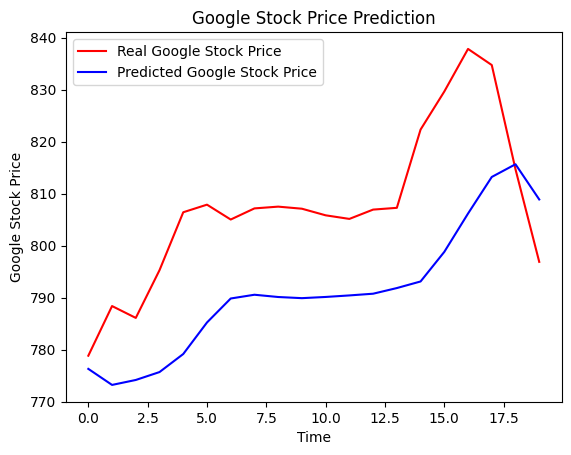

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [31]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

19.366532675551387
